In [1]:
import os
import scanpy as sc
import anndata as an
import numpy as np
from pathlib import Path
from matplotlib import rcParams
from deside.utility import set_fig_style
set_fig_style(font_family='Arial', font_size=8)

2023-12-20 21:35:48.960646: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 21:35:49.160249: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 21:35:49.847834: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-20 21:35:49.847925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such 

In [2]:
dataset_dir = '../../datasets/'
fig_dir = './sup_fig_results/'

In [3]:
s1 = an.read_h5ad(os.path.join(dataset_dir, 'generated_sc_dataset_12ds_n_base100_all_subtypes', 'simu_bulk_exp_SCT_POS_N10K_log2cpm1p.h5ad'))
s1

AnnData object with n_obs × n_vars = 250000 × 17834
    obs: 'B Cells', 'CD4 T', 'CD8 T', 'DC', 'Endothelial Cells', 'Cancer Cells', 'Fibroblasts', 'Macrophages', 'Mast Cells', 'NK', 'Neutrophils', 'Double-neg-like T', 'Monocytes', 'Non-plasma B cells', 'Plasma B cells', 'CD4 T conv', 'CD4 Treg', 'CD8 T (GZMK high)', 'CD8 T effector', 'mDC', 'pDC', 'Epithelial Cells', 'Glioma Cells', 'CAFs', 'Myofibroblasts'
    var: 'in_bulk'
    uns: 'cell_types', 'dataset_info'

In [4]:
cell_type2subtypes = {'B Cells': ['Non-plasma B cells', 'Plasma B cells'],
                      'CD4 T': ['CD4 T'], 'CD8 T': ['CD8 T (GZMK high)', 'CD8 T effector'],
                      'DC': ['DC'], 'Endothelial Cells': ['Endothelial Cells'],
                      'Cancer Cells': ['Cancer Cells'],
                      'Fibroblasts': ['CAFs', 'Myofibroblasts'], 'Macrophages': ['Macrophages'],
                      'Mast Cells': ['Mast Cells'], 'NK': ['NK'], 'Neutrophils': ['Neutrophils'],
                      'Double-neg-like T': ['Double-neg-like T'], 'Monocytes': ['Monocytes']}
all_cell_types = sorted([i for v in cell_type2subtypes.values() for i in v])
all_cell_types

['CAFs',
 'CD4 T',
 'CD8 T (GZMK high)',
 'CD8 T effector',
 'Cancer Cells',
 'DC',
 'Double-neg-like T',
 'Endothelial Cells',
 'Macrophages',
 'Mast Cells',
 'Monocytes',
 'Myofibroblasts',
 'NK',
 'Neutrophils',
 'Non-plasma B cells',
 'Plasma B cells']

In [5]:
s1.obs.head(2)

,B Cells,CD4 T,CD8 T,DC,Endothelial Cells,Cancer Cells,Fibroblasts,Macrophages,Mast Cells,NK,...,CD4 T conv,CD4 Treg,CD8 T (GZMK high),CD8 T effector,mDC,pDC,Epithelial Cells,Glioma Cells,CAFs,Myofibroblasts
SCT_POS_N10K_pos_B Cells_0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SCT_POS_N10K_pos_B Cells_1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
s1_16types = s1.obs.loc[:, all_cell_types]
s1_16types = s1_16types.loc[s1_16types.sum(axis=1)==1, :].copy()
print(s1_16types.shape)
s1_16types.head(2)

(160000, 16)


,CAFs,CD4 T,CD8 T (GZMK high),CD8 T effector,Cancer Cells,DC,Double-neg-like T,Endothelial Cells,Macrophages,Mast Cells,Monocytes,Myofibroblasts,NK,Neutrophils,Non-plasma B cells,Plasma B cells
SCT_POS_N10K_pos_CD4 T_0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SCT_POS_N10K_pos_CD4 T_1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
s1 = s1[s1_16types.index, :].copy()
s1

AnnData object with n_obs × n_vars = 160000 × 17834
    obs: 'B Cells', 'CD4 T', 'CD8 T', 'DC', 'Endothelial Cells', 'Cancer Cells', 'Fibroblasts', 'Macrophages', 'Mast Cells', 'NK', 'Neutrophils', 'Double-neg-like T', 'Monocytes', 'Non-plasma B cells', 'Plasma B cells', 'CD4 T conv', 'CD4 Treg', 'CD8 T (GZMK high)', 'CD8 T effector', 'mDC', 'pDC', 'Epithelial Cells', 'Glioma Cells', 'CAFs', 'Myofibroblasts'
    var: 'in_bulk'
    uns: 'cell_types', 'dataset_info'

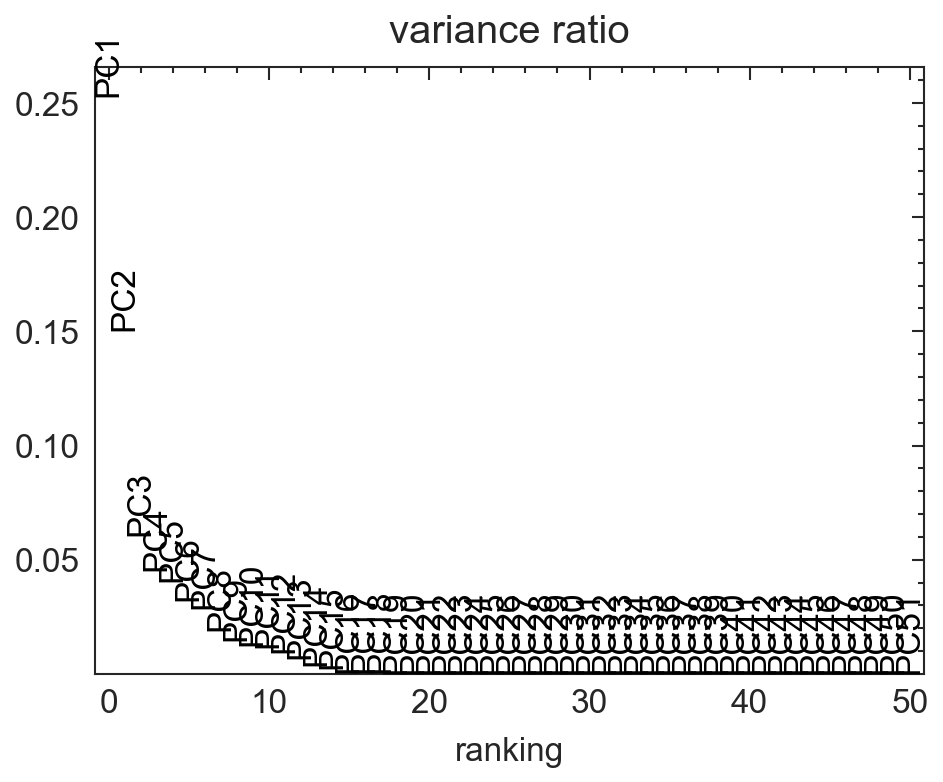

In [8]:
sc.tl.pca(s1, svd_solver='arpack', n_comps=100, use_highly_variable=False, zero_center=True)
sc.pl.pca_variance_ratio(s1, n_pcs=50)

In [9]:
sc.pp.neighbors(s1, n_neighbors=35, n_pcs=30)
sc.tl.umap(s1)
sc.tl.leiden(s1)

/home/phyxiongx/.conda/envs/ds/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [10]:
id2cell_type = dict(zip(range(16), list(s1_16types.columns)))
id2cell_type

{0: 'CAFs',
 1: 'CD4 T',
 2: 'CD8 T (GZMK high)',
 3: 'CD8 T effector',
 4: 'Cancer Cells',
 5: 'DC',
 6: 'Double-neg-like T',
 7: 'Endothelial Cells',
 8: 'Macrophages',
 9: 'Mast Cells',
 10: 'Monocytes',
 11: 'Myofibroblasts',
 12: 'NK',
 13: 'Neutrophils',
 14: 'Non-plasma B cells',
 15: 'Plasma B cells'}

In [11]:
assert np.all(s1.obs.index == s1_16types.index)

In [12]:
s1_16types['cell_type_id'] = np.argmax(s1_16types.values, axis=1)
s1_16types['cell_type'] = s1_16types['cell_type_id'].map(id2cell_type)

In [13]:
s1_16types.head(2)

,CAFs,CD4 T,CD8 T (GZMK high),CD8 T effector,Cancer Cells,DC,Double-neg-like T,Endothelial Cells,Macrophages,Mast Cells,Monocytes,Myofibroblasts,NK,Neutrophils,Non-plasma B cells,Plasma B cells,cell_type_id,cell_type
SCT_POS_N10K_pos_CD4 T_0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CD4 T
SCT_POS_N10K_pos_CD4 T_1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,CD4 T


In [14]:
s1_16types.tail()

,CAFs,CD4 T,CD8 T (GZMK high),CD8 T effector,Cancer Cells,DC,Double-neg-like T,Endothelial Cells,Macrophages,Mast Cells,Monocytes,Myofibroblasts,NK,Neutrophils,Non-plasma B cells,Plasma B cells,cell_type_id,cell_type
SCT_POS_N10K_pos_Myofibroblasts_9995,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,Myofibroblasts
SCT_POS_N10K_pos_Myofibroblasts_9996,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,Myofibroblasts
SCT_POS_N10K_pos_Myofibroblasts_9997,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,Myofibroblasts
SCT_POS_N10K_pos_Myofibroblasts_9998,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,Myofibroblasts
SCT_POS_N10K_pos_Myofibroblasts_9999,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,11,Myofibroblasts


In [15]:
s1.obs['cell_type_id'] = s1_16types['cell_type_id']
s1.obs['cell_type'] = s1_16types['cell_type']
s1.obs.head(2)

,B Cells,CD4 T,CD8 T,DC,Endothelial Cells,Cancer Cells,Fibroblasts,Macrophages,Mast Cells,NK,...,CD8 T effector,mDC,pDC,Epithelial Cells,Glioma Cells,CAFs,Myofibroblasts,leiden,cell_type_id,cell_type
SCT_POS_N10K_pos_CD4 T_0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,CD4 T
SCT_POS_N10K_pos_CD4 T_1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,CD4 T


/home/phyxiongx/.conda/envs/ds/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


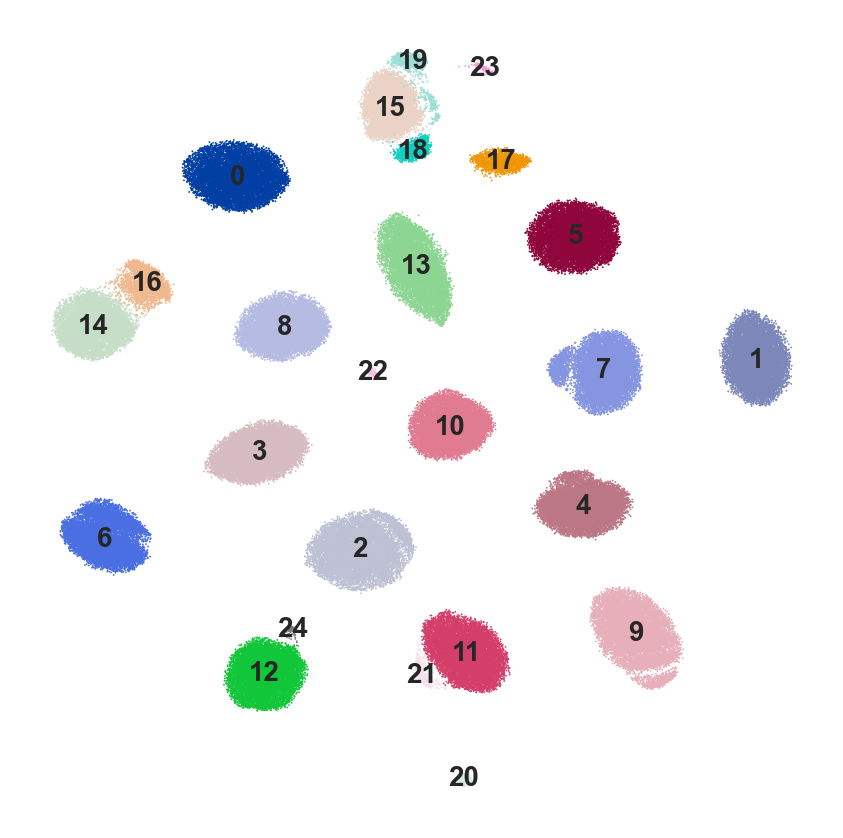

In [16]:
sc._settings.ScanpyConfig.figdir = Path(fig_dir)
rcParams['figure.figsize'] = 3.5, 3.5
sc.pl.umap(s1, color='leiden', legend_loc='on data', legend_fontsize='small', 
           title='', frameon=False, save='_sct_clustering_S1.svg')

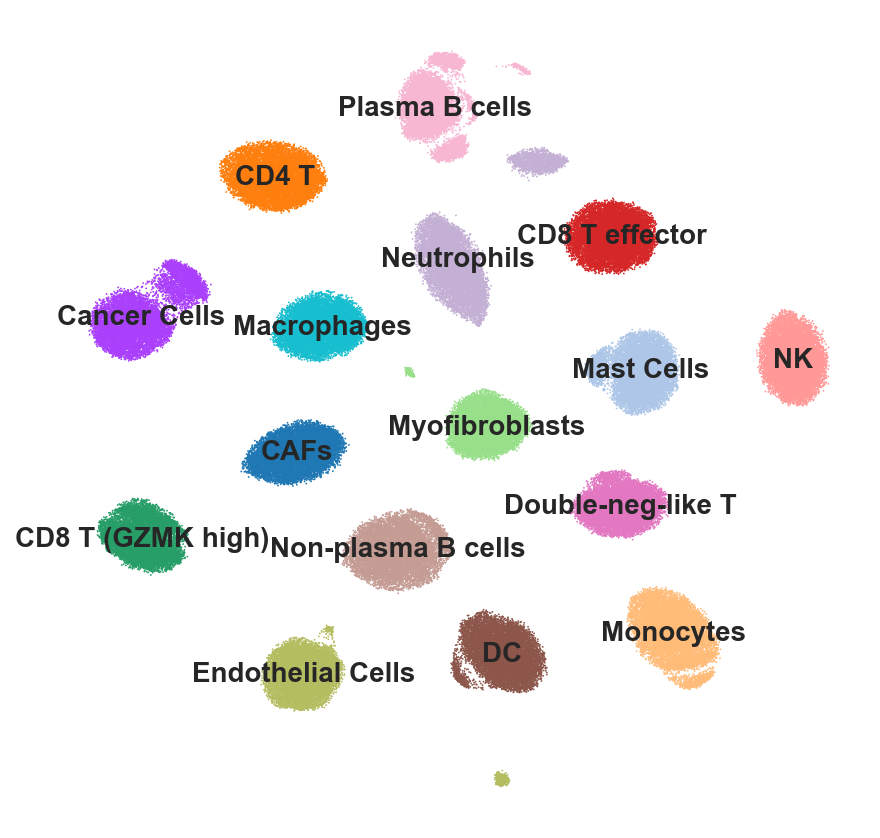

In [17]:
sc.pl.umap(s1, color='cell_type', legend_loc='on data', legend_fontsize='small', 
           title='', frameon=False, save='_sct_cell_type_S1.svg')